# Projet 2 : Analysez les données de systèmes éducatifs

# Importation de l'ensemble des librairies nécessaires

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fichiers du projet


    (A signaler qu'il n'y a pas de problème d'importation dès la première importation des fichiers)

In [47]:
EdStatsCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
EdStatsCountry = pd.read_csv("EdStatsCountry.csv")
EdStatsData = pd.read_csv("EdStatsData.csv")
EdStatsFootNote = pd.read_csv("EdStatsFootNote.csv")
EdStatsSeries = pd.read_csv("EdStatsSeries.csv")

## Visualisation des premières lignes

    La visualisation des premières lignes nous permet l'analyse suivante :
        - EdStatsCountrySeries : De manière générale le tableau semble
        représenter une collection de variables disponibles pour les pays
        et la provenance des données.Il y a une ligne par variable décrite.
        La ligne contient le code pays,le nom de la variable et la description
        du mode de recueil. 
        - EdStatsCountry : Le fichier contient un certain nombre d'information 
        concernant les différents pays. Une ligne représente un pays avec
        plusieurs variables pour décrire les données du pays, leur ancienneté, 
        le systeme de récupération des données, etc.
        - EdStatsData : Chaque ligne du fichier semble représenter 
        le résultat d'un indicateur pour un pays et par année.
        - EdStatsFootNote : Chaque ligne représente un code de serie avec
        en indication son pays rattaché, une description et une année.
        - EdStatsSeries : Chaque ligne représente un nom de series avec les
        informations qui lui sont rattaché pour la décrire. 




In [48]:
# EdStatsCountrySeries.head()
# EdStatsCountry.head()
# EdStatsData.head()
# EdStatsFootNote.head()
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualisation des informations des fichiers

In [49]:
# EdStatsCountrySeries.info()
# EdStatsCountry.info()
# EdStatsData.info()
# EdStatsFootNote.info()
EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [50]:
# Dictionnaire contenant tes DataFrames avec leurs noms
dataframes = {
    "EdStatsCountrySeries": EdStatsCountrySeries,
    "EdStatsCountry": EdStatsCountry,
    "EdStatsData": EdStatsData,
    "EdStatsFootNote": EdStatsFootNote,
    "EdStatsSeries": EdStatsSeries
}

# Boucle pour afficher les dimensions de chaque DataFrame
for nom, df in dataframes.items():
    n_lignes, n_colonnes = df.shape
    print(f"{nom} contient {n_lignes} lignes et {n_colonnes} colonnes.")

EdStatsCountrySeries contient 613 lignes et 4 colonnes.
EdStatsCountry contient 241 lignes et 32 colonnes.
EdStatsData contient 886930 lignes et 70 colonnes.
EdStatsFootNote contient 643638 lignes et 5 colonnes.
EdStatsSeries contient 3665 lignes et 21 colonnes.


In [51]:
# Dictionnaire avec les DataFrames et les colonnes à tester pour les doublons
doublon_checks = {
    "EdStatsCountrySeries": (
        EdStatsCountrySeries, ['CountryCode', 'SeriesCode']
    ),
    "EdStatsCountry": (EdStatsCountry, ['Short Name']),
    "EdStatsData": (EdStatsData, ['Country Code', 'Indicator Name']),
    "EdStatsFootNote": (
        EdStatsFootNote, ['CountryCode', 'SeriesCode', 'Year']
    ),
    "EdStatsSeries": (EdStatsSeries, ['Series Code'])
}

# Boucle sur chaque DataFrame
for nom_df, (df, colonnes) in doublon_checks.items():
    doublons = df.duplicated(subset=colonnes, keep=False)
    nb_doublons = doublons.sum()

    if nb_doublons == 0:
        print(f"{nom_df} ne semble pas contenir de doublons.")
    else:
        print(f"{nom_df} semble contenir {nb_doublons} doublons.")

EdStatsCountrySeries ne semble pas contenir de doublons.
EdStatsCountry ne semble pas contenir de doublons.
EdStatsData ne semble pas contenir de doublons.
EdStatsFootNote ne semble pas contenir de doublons.
EdStatsSeries ne semble pas contenir de doublons.


## Calcul du pourcentage de cases vides par colonnes

In [52]:
# EdStatsCountrySeries.isnull().mean().sort_values(ascending=False)
# EdStatsCountry.isnull().mean().sort_values(ascending=False)
# EdStatsData.isnull().mean().sort_values(ascending=False)
# EdStatsFootNote.isnull().mean().sort_values(ascending=False)
# EdStatsSeries.isnull().mean().sort_values(ascending=False)

In [53]:
# Dictionnaire des DataFrames
dataframes = {
    "EdStatsCountrySeries": EdStatsCountrySeries,
    "EdStatsCountry": EdStatsCountry,
    "EdStatsData": EdStatsData,
    "EdStatsFootNote": EdStatsFootNote,
    "EdStatsSeries": EdStatsSeries
}


# Fonction d'analyse des colonnes vides
def analyse_colonnes_vides(nom_df, df):
    na_ratio = df.isna().mean()  # proportion de NaN par colonne

    colonnes_vides = na_ratio[na_ratio == 1.0].index.tolist()
    colonnes_partielles = (
        na_ratio[(na_ratio > 0.3) & (na_ratio < 1.0)]
        .sort_values(ascending=False)
    )

    if colonnes_vides:
        print(
            f"{nom_df} contient {len(colonnes_vides)} colonne"
            f"{'s' if len(colonnes_vides) > 1 else ''} complètement vide"
            f"{'s' if len(colonnes_vides) > 1 else ''}.\n"
            f"Colonne{'s' if len(colonnes_vides) > 1 else ''} à enlever :\n"
        )
        for col in colonnes_vides:
            print(f"    - {col}")
    else:
        print(
            f"{nom_df} ne contient aucune colonne complètement vide."
        )

    if not colonnes_partielles.empty:
        print(
            "\nLe fichier contient aussi des colonnes avec de forts "
            "pourcentages de cases vides.\n"
            "Il faut réfléchir à s'en débarrasser si besoin.\n"
        )

    print("-" * 60)  # ligne de séparation


# Boucle sur chaque DataFrame
for nom_df, df in dataframes.items():
    analyse_colonnes_vides(nom_df, df)

EdStatsCountrySeries contient 1 colonne complètement vide.
Colonne à enlever :

    - Unnamed: 3
------------------------------------------------------------
EdStatsCountry contient 1 colonne complètement vide.
Colonne à enlever :

    - Unnamed: 31

Le fichier contient aussi des colonnes avec de forts pourcentages de cases vides.
Il faut réfléchir à s'en débarrasser si besoin.

------------------------------------------------------------
EdStatsData contient 1 colonne complètement vide.
Colonne à enlever :

    - Unnamed: 69

Le fichier contient aussi des colonnes avec de forts pourcentages de cases vides.
Il faut réfléchir à s'en débarrasser si besoin.

------------------------------------------------------------
EdStatsFootNote contient 1 colonne complètement vide.
Colonne à enlever :

    - Unnamed: 4
------------------------------------------------------------
EdStatsSeries contient 6 colonnes complètement vides.
Colonnes à enlever :

    - Unit of measure
    - Notes from origina

## Suppression des colonnes vides

In [54]:
del EdStatsCountrySeries['Unnamed: 3']
del EdStatsCountry['Unnamed: 31']
del EdStatsData['Unnamed: 69']
del EdStatsFootNote['Unnamed: 4']
del EdStatsSeries['Other web links']
del EdStatsSeries['Unnamed: 20']
del EdStatsSeries['License Type']
del EdStatsSeries['Notes from original source']
del EdStatsSeries['Unit of measure']
del EdStatsSeries['Related indicators']

# Description des données quantitatives 

In [55]:
# EdStatsData.describe()

## Description des données qualitatives

In [56]:
# EdStatsCountrySeries["SeriesCode"].value_counts()
# EdStatsCountrySeries["SeriesCode"].value_counts()
# EdStatsCountry['2-alpha code'].value_counts()
# EdStatsData['Country Code'].value_counts()
# EdStatsFootNote['Year'].value_counts().sort_values()
len(EdStatsSeries['Indicator Name'].value_counts())

3665

In [57]:
def decrire_toutes_colonnes(dataframes):
    for nom_df, df in dataframes.items():
        print(f"\n📊 Description des colonnes du DataFrame : {nom_df}\n")

        for col in df.columns:
            serie = df[col].dropna()
            n_unique = serie.nunique()

            print(f"🔹 Variable : {col}")
            print(
                f"  - Nombre total de valeurs (non nulles) : {len(serie)}"
            )
            print(f"  - Nombre de valeurs distinctes : {n_unique}")

            if n_unique == 1:
                print(
                    "  - Toutes les valeurs sont identiques. "
                    "Pas de variation à analyser.\n"
                )
                continue

            value_counts = serie.value_counts()
            min_occ = value_counts.min()
            max_occ = value_counts.max()

            print(f"  - Occurrence minimale : {min_occ}")
            print(f"  - Occurrence maximale : {max_occ}")

            if n_unique <= 5:
                print("  - Valeurs les plus fréquentes :")
                print(value_counts.to_string())
            else:
                print(
                    "  - Trop de valeurs distinctes pour affichage "
                    "détaillé.\n"
                )


decrire_toutes_colonnes(dataframes)


📊 Description des colonnes du DataFrame : EdStatsCountrySeries

🔹 Variable : CountryCode
  - Nombre total de valeurs (non nulles) : 613
  - Nombre de valeurs distinctes : 211
  - Occurrence minimale : 2
  - Occurrence maximale : 18
  - Trop de valeurs distinctes pour affichage détaillé.

🔹 Variable : SeriesCode
  - Nombre total de valeurs (non nulles) : 613
  - Nombre de valeurs distinctes : 21
  - Occurrence minimale : 4
  - Occurrence maximale : 211
  - Trop de valeurs distinctes pour affichage détaillé.

🔹 Variable : DESCRIPTION
  - Nombre total de valeurs (non nulles) : 613
  - Nombre de valeurs distinctes : 97
  - Occurrence minimale : 1
  - Occurrence maximale : 154
  - Trop de valeurs distinctes pour affichage détaillé.


📊 Description des colonnes du DataFrame : EdStatsCountry

🔹 Variable : Country Code
  - Nombre total de valeurs (non nulles) : 241
  - Nombre de valeurs distinctes : 241
  - Occurrence minimale : 1
  - Occurrence maximale : 1
  - Trop de valeurs distinctes pou

# Regroupement des noms sur le fichier country

En réalisant le netttoyage de la table country nous obtenons 192 pays.
Il en manque 1 puisque le monde est censé avoir 193 pays reconnu par l'ONU
(197 pays en comptant certains petit comme le vatican). 

In [58]:
# Ici je fais une impression de l'ensemble des pays
EdStatsCountry['Table Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific',
       'East Asia & Pacific (all income levels)', 'Europe & Central Asia',
       'Europe & Central Asia (

In [59]:
non_pays = [
    "Arab World",
    "East Asia & Pacific",
    "East Asia & Pacific (all income levels)",
    "Europe & Central Asia",
    "Europe & Central Asia (all income levels)",
    "Euro area",
    "European Union",
    'High income',
    "Latin America & Caribbean",
    "Latin America & Caribbean (all income levels)",
    "Least developed countries: UN classification",
    "Low income",
    "Lower middle income",
    "Low & middle income",
    "Middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (all income levels)",
    "North America",
    "OECD members",
    "South Asia",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (all income levels)",
    "Upper middle income",
    "World",
    "Heavily indebted poor countries (HIPC)"
]


# Ici je nettoie le dataframe des pays qui ne
# sont pas valide selon ma liste non_pays
EdStatsCountry_clean = EdStatsCountry[
    ~EdStatsCountry['Table Name'].isin(non_pays)
]

Ici je fais un nettoyage des dataframes contenant des pays à l'aide 
des deux méthodes dictionnaires et merge. 
A chaque fois le résultat des deux est identique. 

In [60]:
codePays = EdStatsCountry_clean['Country Code'].unique()

EdStatsCountrySeries_clean = EdStatsCountrySeries[
    EdStatsCountrySeries['CountryCode'].isin(codePays)
]

EdStatsCountrySeries_clean['CountryCode'].value_counts()

CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

In [61]:
EdStatsCountrySeries_clean2 = pd.merge(
    EdStatsCountry_clean, EdStatsCountrySeries,
    left_on='Country Code', right_on='CountryCode', how='left'
)

EdStatsCountrySeries_clean2['CountryCode'].value_counts()

CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

In [62]:
EdStatsData_clean = EdStatsData[EdStatsData['Country Code'].isin(codePays)]

EdStatsData_clean['Country Code'].value_counts()

Country Code
AFG    3665
ALB    3665
DZA    3665
ASM    3665
AND    3665
       ... 
VIR    3665
PSE    3665
YEM    3665
ZMB    3665
ZWE    3665
Name: count, Length: 216, dtype: int64

In [63]:
EdStatsData_clean2 = pd.merge(
    EdStatsCountry_clean, EdStatsData,
    left_on='Country Code', right_on='Country Code', how='left'
)

EdStatsData_clean2['Country Code'].value_counts()

Country Code
ABW    3665
AFG    3665
AGO    3665
ALB    3665
AND    3665
       ... 
XKX    3665
YEM    3665
ZAF    3665
ZMB    3665
ZWE    3665
Name: count, Length: 216, dtype: int64

In [64]:
EdStatsFootNote_clean = EdStatsFootNote[
    EdStatsFootNote['CountryCode'].isin(codePays)
]

EdStatsFootNote_clean['CountryCode'].value_counts()

CountryCode
CYP    7183
AZE    5451
MDA    5095
HKG    4785
UKR    4719
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 213, dtype: int64

In [65]:
EdStatsFootNote_clean2 = pd.merge(
    EdStatsCountry_clean, EdStatsFootNote,
    left_on='Country Code', right_on='CountryCode', how='left'
)

EdStatsFootNote_clean2['CountryCode'].value_counts()

CountryCode
CYP    7183
AZE    5451
MDA    5095
HKG    4785
UKR    4719
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 213, dtype: int64

# Selection des Topics que je souhaitent garder selon une approche métier.

Je commence par extraire dans la colonne Topic de EdStatsSeries l'ensemble des items pour selectionner ceux qui me semblent pertinents. 

Avant le nettoyage des données topic, le fichier data contennait 3665 valeurs indicator, il y a maintenant 902 valeurs indicator. 

In [66]:
EdStatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Pour ma selection de topic j'ai fait le choix suivant : 

'Secondary',
'Population',
'Tertiary',
'Expenditures',
'Engaging the Private Sector (SABER)',
'Literacy',
'Education Management Information Systems (SABER)',
'Post-Secondary/Non-Tertiary',
'School Finance (SABER)',
'Tertiary Education (SABER)',
'Health: Population: Structure',
'Social Protection & Labor: Unemployment',
'Infrastructure: Communications',
'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
'Health: Population: Dynamics'

Cette selection est faites pour prendre en compte des variables qui concernent
le sujet de l'éducation au lycée et à l'université. Pour cela j'ai selectionné 
des sujets potentiellement sur le niveau scolaire, le volume de population,
les volumes financiers et les capacités de communication pour l'aspect distanciel. 
J'ai aussi gardé le lien avec la place de l'enseignement privé. 

In [67]:
Topic_approche_metier = [
    'Secondary',
    'Population',
    'Tertiary',
    'Expenditures',
    'Engaging the Private Sector (SABER)',
    'Literacy',
    'Education Management Information Systems (SABER)',
    'Post-Secondary/Non-Tertiary',
    'School Finance (SABER)',
    'Tertiary Education (SABER)',
    'Health: Population: Structure',
    'Social Protection & Labor: Unemployment',
    'Infrastructure: Communications',
    (
        'Economic Policy & Debt: National accounts: '
        'US$ at constant 2010 prices: Aggregate indicators'
    ),
    (
        'Economic Policy & Debt: National accounts: Atlas GNI & '
        'GNI per capita'
    ),
    'Health: Population: Dynamics'
]

EdStatsSeries_Nettoyage_Metier = EdStatsSeries[
    EdStatsSeries['Topic'].isin(Topic_approche_metier)
]

# EdStatsSeries_Nettoyage_Metier['Indicator Name'].value_counts()


Ici je fais un nettoyage de l'ensemble des dataframe en utilisant la liste des indicators names de EdStatsSeries_Nettoyage_Metier, le dataframe qui a été nettoyé grace au topic. 

Il reste 509  lignes pour le fichier EdStatsCountrySeries_Indicateurs_selectionne qui en comptait 613  sous sa forme EdStatsCountrySeries_clean

Il reste 186840 lignes pour le fichier EdStatsData_Indicateurs_selectionne qui en comptait 791640 sous sa forme EdStatsData_clean

Il reste 243369 lignes pour le fichier EdStatsFootNote_Indicateurs_selectionne qui en comptait 518109 sous sa forme EdStatsFootNote_clean

 



In [68]:
Nom_indicateur_a_retenir = EdStatsSeries_Nettoyage_Metier[
    'Series Code'].unique()

EdStatsCountrySeries_Indicateurs_selectionne = EdStatsCountrySeries_clean[
    EdStatsCountrySeries_clean['SeriesCode'].isin(Nom_indicateur_a_retenir)
]

# EdStatsCountrySeries_Indicateurs_selectionne.head()
EdStatsCountrySeries_clean.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [69]:
EdStatsData_Indicateurs_selectionne = EdStatsData_clean[
    EdStatsData_clean['Indicator Code'].isin(Nom_indicateur_a_retenir)
]

# EdStatsData_Indicateurs_selectionne.head()
EdStatsData_clean.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
EdStatsFootNote_Indicateurs_selectionne = EdStatsFootNote_clean[
    EdStatsFootNote_clean['SeriesCode'].isin(Nom_indicateur_a_retenir)
]

EdStatsFootNote_Indicateurs_selectionne
EdStatsFootNote_clean.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


# Interpretation et selection des années du fichier data

En l'état, le fichier data possede des colonnes années qui contiennent l'ensemble des données par indicateurs (qui sont en ligne) 

In [71]:
EdStatsData_Indicateurs_selectionne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186840 entries, 91625 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    186840 non-null  object 
 1   Country Code    186840 non-null  object 
 2   Indicator Name  186840 non-null  object 
 3   Indicator Code  186840 non-null  object 
 4   1970            11474 non-null   float64
 5   1971            18650 non-null   float64
 6   1972            18403 non-null   float64
 7   1973            18388 non-null   float64
 8   1974            18446 non-null   float64
 9   1975            17972 non-null   float64
 10  1976            18871 non-null   float64
 11  1977            19081 non-null   float64
 12  1978            18927 non-null   float64
 13  1979            18756 non-null   float64
 14  1980            18752 non-null   float64
 15  1981            18987 non-null   float64
 16  1982            18325 non-null   float64
 17  1983       

En utilisant cette technique de boucle for,
je supprime les colonnes annees que je n'utiliserai pas. 
J'ai choisi de garder celles qui sont le plus rempli. 
J'ai donc supprimer les colonnes pour la projection 
qui sont vides après mon traitement sur les indicateurs
et qui doivent donc contenir des projetion sur des indicateurs
qui ne sont pas métiers. 
J'ai aussi gardé des années proches de notre date d'analyse
en gardant celles qui sont apparemment les plus remplis.
J'ai donc garder à partir de 1999 jusqu'en 2017. 
En regardant le résultat, je m'aperçois que les années 2016 
et 2017 sont à plus de 94 % des cellules vides.
Je fais donc le choix de les supprimer également.  

A partir de là, il reste deux années qui posent 
questions avec plus de 63 % de cases vide en 2014
et plus de 72 % de cases vides pour 2015. 
Je décide de les garder en l'état. 


In [72]:
Annee_a_supprimer_periode_1 = np.arange(1970, 1999, 1)
Annee_a_supprimer_periode_2 = np.arange(2016, 2101, 1)
Annee_a_supprimer = np.concatenate(
    [Annee_a_supprimer_periode_1, Annee_a_supprimer_periode_2]
)

for annee in Annee_a_supprimer:
    if str(annee) in EdStatsData_Indicateurs_selectionne.columns:
        del EdStatsData_Indicateurs_selectionne[str(annee)]

Annee_a_supprimer


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
       2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
       2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063,
       2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
       2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085,
       2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
       2097, 2098, 2099, 2100])

In [73]:
# EdStatsData_Indicateurs_selectionne.info()
# EdStatsData_Indicateurs_selectionne.isnull().mean()
EdStatsData_Indicateurs_selectionne.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN
91633,Afghanistan,AFG,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.332621,32.417030,NaN


# Methode GroupBy pour continuer la selection des variables et des années

In [74]:
methode_selection_variables = EdStatsData_Indicateurs_selectionne.groupby(
    'Indicator Name'
)[
    [
        '1999', '2000', '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010', '2011', '2012',
        '2013', '2014', '2015'
    ]
].count()

methode_selection_variables['Proportion_renseignée'] = (
    methode_selection_variables.mean(axis=1)
)

methode_selection_variables.sort_values(
    'Proportion_renseignée', ascending=False
)

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Proportion_renseignée
Indicator Name,,,,,,,,,,,,,,,,,,
"Population, total",215,215,215,215,215,215,215,215,215,215,215,215,215,214,214,210,210,214.294118
Population growth (annual %),215,215,215,215,215,215,215,215,215,215,215,215,214,214,214,210,210,214.235294
Theoretical duration of upper secondary education (years),207,204,204,204,204,204,204,204,204,204,204,204,203,203,204,204,204,204.058824
Official entrance age to lower secondary education (years),207,204,204,204,204,204,204,204,204,204,204,204,203,203,204,204,204,204.058824
Theoretical duration of secondary education (years),204,204,204,204,204,204,204,204,204,204,204,204,203,203,204,204,204,203.882353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SABER: (Tertiary Education) Policy Goal 3: Governance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
SABER: (Tertiary Education) Policy Goal 2: Regulatory Framework for Tertiary Education,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
SABER: (Tertiary Education) Policy Goal 2 Lever 1: Steering the system,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000


Ici je créer un dataframe pour selectionner uniquement 
les variables jugé nécessaire pour une première analyse. 

In [75]:
liste_items = [
    "Population growth (annual %)",
    "Internet users (per 100 people)",
    "GDP per capita (constant 2005 US$)",
    "Population, ages 15-64, total",
    (
        "Population of the official age for upper secondary "
        "education, both sexes (number)"
    ),
    (
        "Population of the official age for lower secondary "
        "education, both sexes (number)"
    ),
    (
        "Population of the official age for secondary education, "
        "both sexes (number)"
    ),
    (
        "Population of the official entrance age to secondary "
        "general education, both sexes (number)"
    ),
    "Unemployment, total (% of total labor force)",
    "Population, ages 12-18, total",
    "Population, ages 15-24, total",
    (
        "Population of the official age for tertiary education, "
        "both sexes (number)"
    ),
    "Enrolment in secondary general, both sexes (number)",
    (
        "Enrolment in tertiary education, all programmes, "
        "both sexes (number)"
    ),
    "School life expectancy, tertiary, both sexes (years)",
    "Government expenditure on education as % of GDP (%)",
    (
        "Enrolment in secondary education, private institutions, "
        "both sexes (number)"
    )
]

DataframeFinal_v1 = EdStatsData_Indicateurs_selectionne[
    EdStatsData_Indicateurs_selectionne['Indicator Name'].isin(
        liste_items
    )
]

DataframeFinal_v1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.813200e+04,4.705200e+04,NaN,5.146900e+04,NaN
92822,Afghanistan,AFG,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,NaN,362415.0,395223.000000,405002.000000,591541.000000,...,NaN,1.028382e+06,1.415293e+06,1.693479e+06,2.032719e+06,2.190878e+06,2.392465e+06,2.508900e+06,2.577715e+06,2.671830e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,26211.000000,27648.000000,...,NaN,NaN,NaN,9.518500e+04,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92869,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,364.570573,376.758714,364.095436,...,397.985905,4.403682e+02,4.449501e+02,5.248235e+02,5.533003e+02,5.692334e+02,6.304274e+02,6.218181e+02,6.102419e+02,5.991352e+02
92885,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.461490e+00,3.439140e+00,2.527540e+00,3.481400e+00,3.780280e+00,3.317540e+00


# Création d'un dataframe utilisable pour les analyses
## Avec matrices de correlations

In [76]:
Pivot_table_evolution_annees = DataframeFinal_v1.pivot_table(
    index='Country Name', columns='Indicator Name', values=[
        '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013', '2014', '2015'
    ], aggfunc="mean"
)

In [77]:
DataframeFinal_v1 = DataframeFinal_v1.copy()
DataframeFinal_v1['Moyenne_1999_2015'] = DataframeFinal_v1[
    ['1999', '2000', '2001', '2002', '2003',
     '2004', '2005', '2006', '2007', '2008',
     '2009', '2010', '2011', '2012', '2013',
     '2014', '2015']
].mean(axis=1)

Pivot_table_annee_cumulés = DataframeFinal_v1.pivot_table(
    index='Country Name', columns='Indicator Name',
    values='Moyenne_1999_2015', aggfunc='mean'
)

Pivot_table_annee_cumulés.head()

Indicator Name,"Enrolment in secondary education, private institutions, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (constant 2005 US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 12-18, total","Population, ages 15-24, total","Population, ages 15-64, total","School life expectancy, tertiary, both sexes (years)","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,42217.666667,1.493449e+06,101884.400000,491.937507,3.334565,3.095920,3.419558,1.890543e+06,3.565040e+06,2.374246e+06,1.674497e+06,655169.588235,4.485225e+06,5.434848e+06,1.334477e+07,0.188350,6.658823
Albania,23488.125000,3.474273e+05,93664.058824,3487.677465,3.249953,25.250741,-0.485464,2.389676e+05,4.579126e+05,2.706498e+05,2.189450e+05,57809.176471,4.170156e+05,5.780788e+05,1.958164e+06,1.732922,14.858824
Algeria,8869.500000,3.568331e+06,934755.666667,4216.146284,4.354250,11.155290,1.607860,2.433722e+06,4.630737e+06,3.692783e+06,2.197015e+06,685138.411765,4.873910e+06,7.102255e+06,2.271883e+07,1.218317,16.223529
American Samoa,NaN,NaN,1607.000000,10308.757460,NaN,NaN,-0.038428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,116.750000,3.573786e+03,413.400000,42830.960451,2.511239,56.940400,1.151700,NaN,NaN,NaN,NaN,NaN,4.809250e+03,7.750625e+03,NaN,NaN,NaN


In [78]:
matrice_correlation_pearson_avant_imputation = (
    Pivot_table_annee_cumulés.corr(method='pearson')
)
matrice_correlation_Spearman_avant_imputation = (
    Pivot_table_annee_cumulés.corr(method='spearman')
)

# matrice_correlation.head()
# matrice_correlation_Spearman.head()

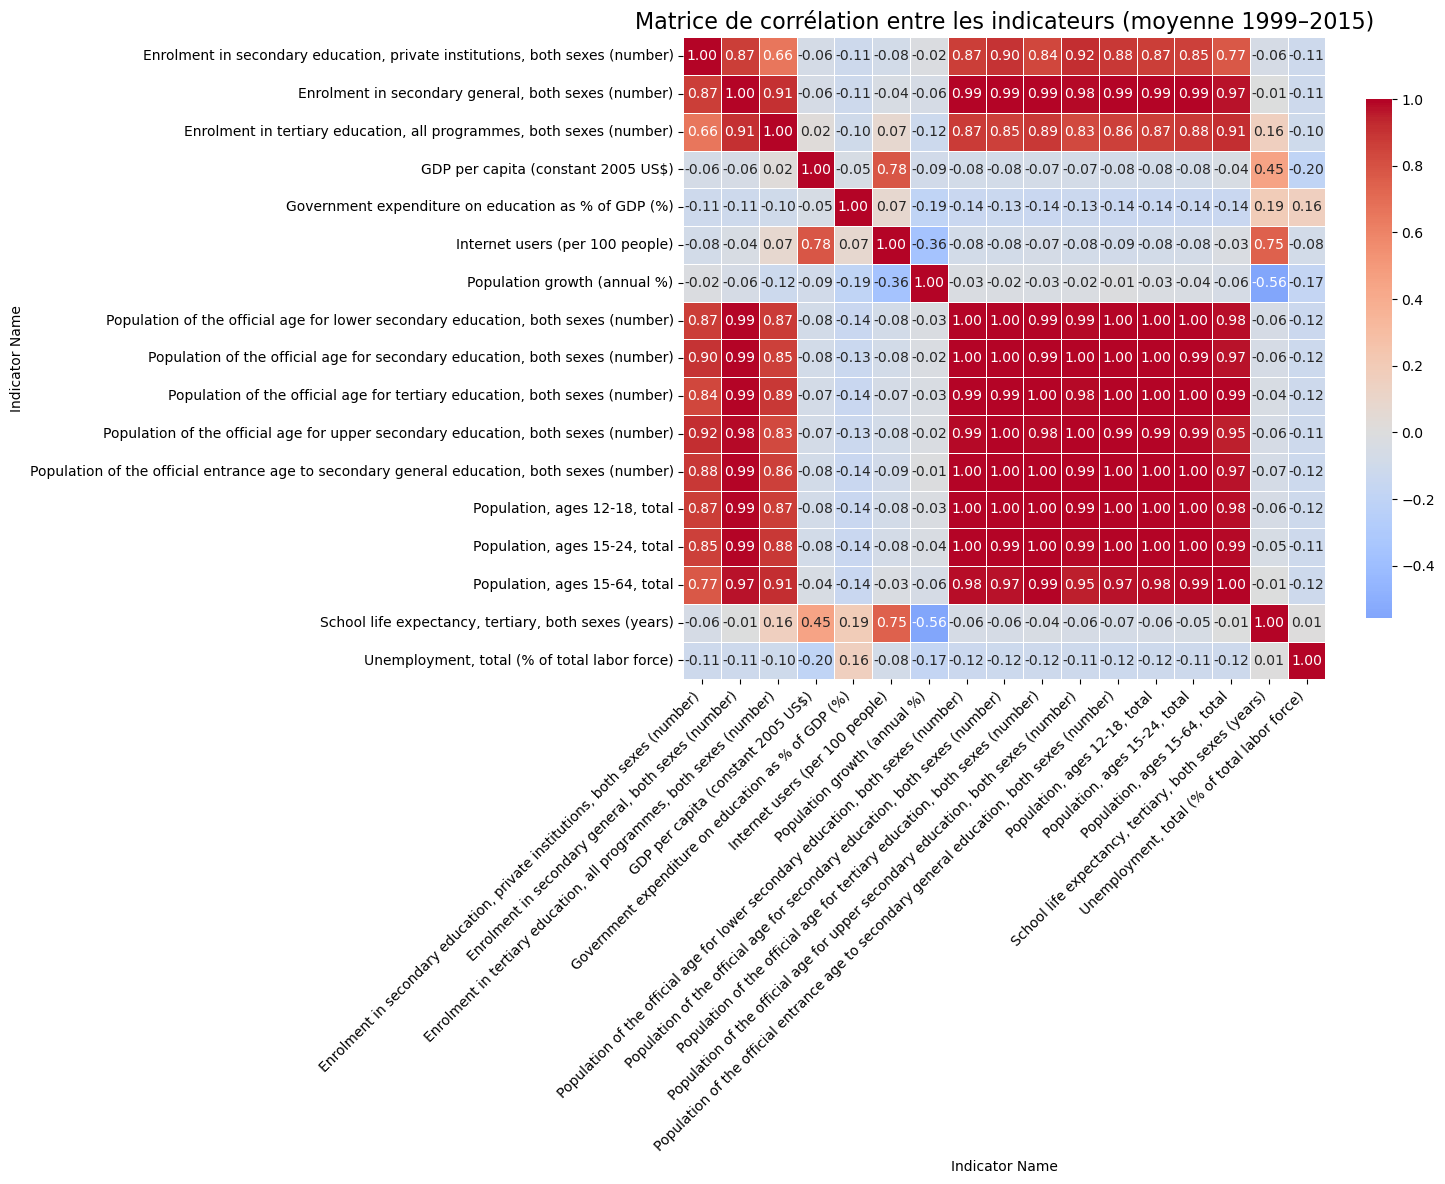

In [79]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    matrice_correlation_pearson_avant_imputation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation entre les indicateurs (moyenne 1999–2015)",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

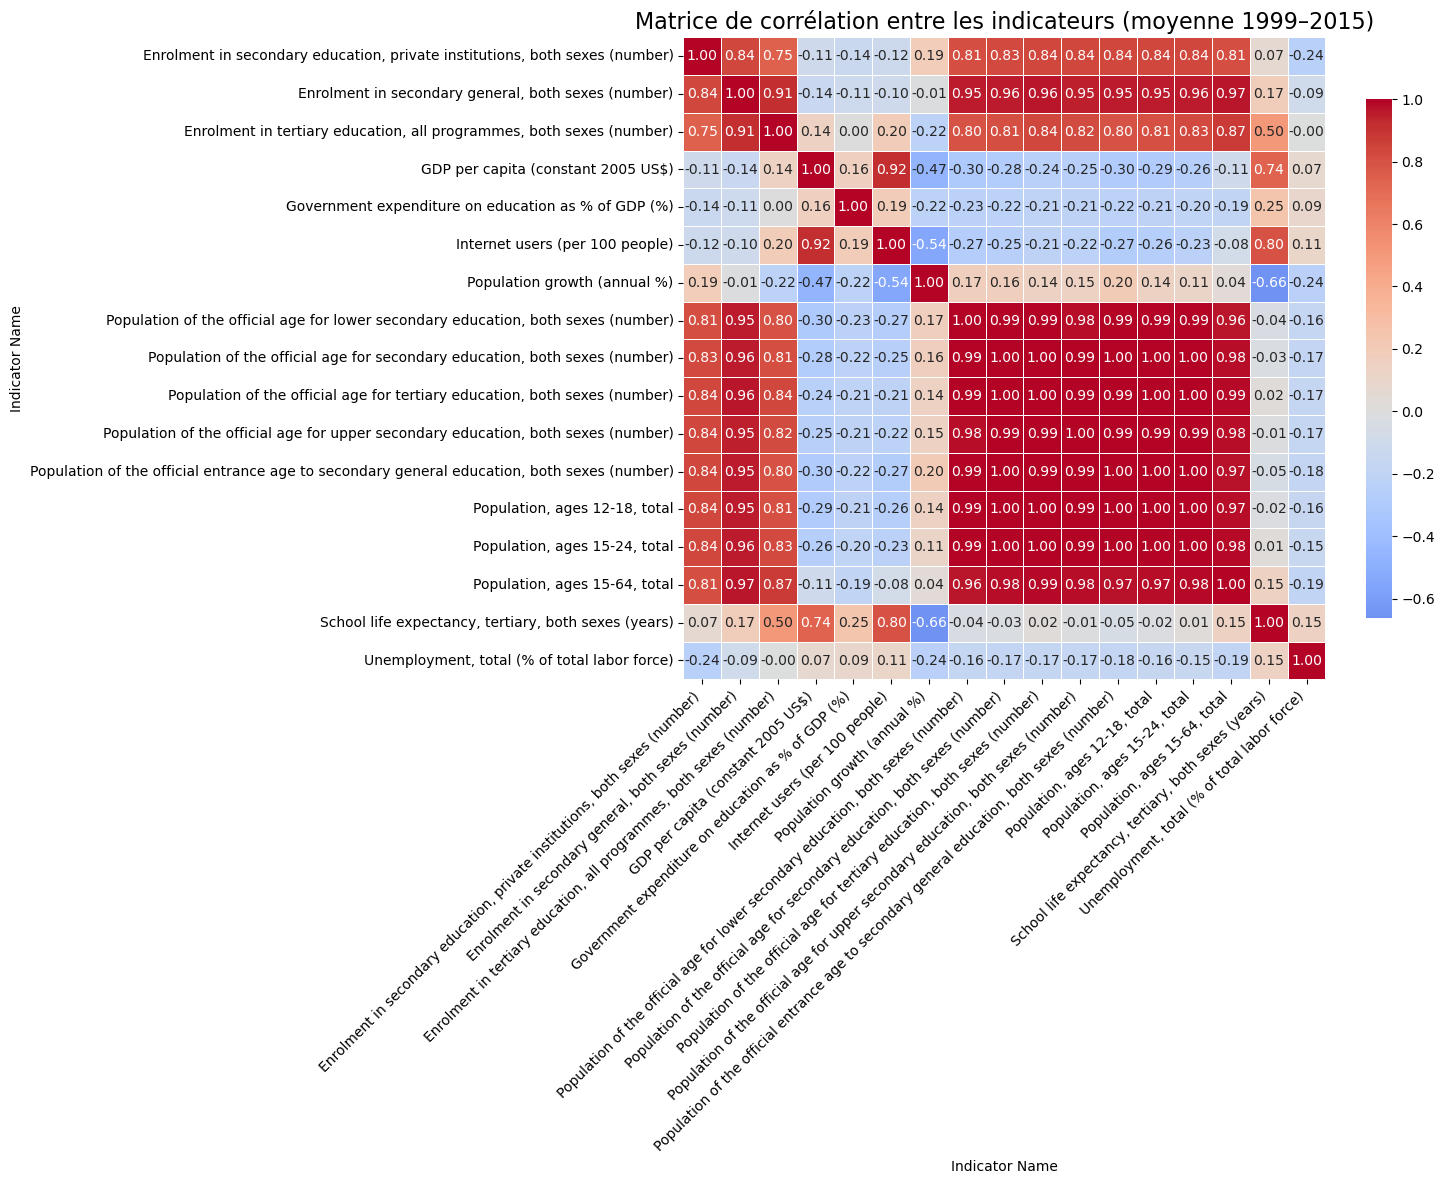

In [80]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    matrice_correlation_Spearman_avant_imputation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation entre les indicateurs (moyenne 1999–2015)",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Nettoyage de la table des pays contenant trop de NA et imputation pour les NA restant

In [81]:
Pivot_table_annee_cumulés["NB_NAN"] = (
    Pivot_table_annee_cumulés.isna().sum(axis=1)
)
Pivot_table_annee_cumulés = Pivot_table_annee_cumulés.loc[
    Pivot_table_annee_cumulés["NB_NAN"] < 10, :
]
Pivot_table_annee_cumulés.sort_values(by="NB_NAN", ascending=False)

Indicator Name,"Enrolment in secondary education, private institutions, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (constant 2005 US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 12-18, total","Population, ages 15-24, total","Population, ages 15-64, total","School life expectancy, tertiary, both sexes (years)","Unemployment, total (% of total labor force)",NB_NAN
Country Name,,,,,,,,,,,,,,,,,,
Andorra,116.750000,3.573786e+03,4.134000e+02,42830.960451,2.511239,56.940400,1.151700,NaN,NaN,NaN,NaN,NaN,4.809250e+03,7.750625e+03,NaN,NaN,NaN,8
Gibraltar,49.333333,1.544400e+03,NaN,NaN,NaN,41.799115,0.620570,7.330000e+02,1.464000e+03,1.801000e+03,7.310000e+02,3.670000e+02,NaN,NaN,NaN,NaN,NaN,8
South Sudan,NaN,1.490670e+05,NaN,NaN,1.309422,NaN,4.151035,4.907406e+05,1.291201e+06,8.288099e+05,8.004605e+05,2.486569e+05,NaN,NaN,4.560460e+06,NaN,NaN,8
Tuvalu,80.000000,1.245000e+03,NaN,3151.366527,NaN,25.914164,0.984275,8.806875e+02,1.486750e+03,8.554167e+02,6.060625e+02,2.279375e+02,NaN,NaN,NaN,NaN,NaN,7
Singapore,14073.666667,2.045287e+05,2.219153e+05,41914.976284,3.252923,61.500474,2.018599,NaN,NaN,NaN,NaN,NaN,4.262038e+05,5.943465e+05,3.407079e+06,NaN,4.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,957046.000000,8.332979e+06,1.601495e+06,1170.193724,5.136473,20.098027,1.147728,6.554688e+06,1.166728e+07,8.496321e+06,5.112588e+06,1.604505e+06,1.226250e+07,1.736512e+07,5.655778e+07,0.890921,2.252941,0
West Bank and Gaza,32471.437500,6.374099e+05,1.547551e+05,2208.270395,1.503760,25.395810,2.737699,5.849323e+05,7.573591e+05,3.776366e+05,1.724268e+05,1.038826e+05,6.587080e+05,7.930112e+05,1.901647e+06,2.213555,23.288235,0
"Yemen, Rep.",38421.125000,1.458700e+06,2.223848e+05,1151.901874,8.018460,8.101648,2.739054,1.692235e+06,3.262006e+06,2.240764e+06,1.569771e+06,5.766459e+05,3.899578e+06,4.835579e+06,1.162177e+07,0.511490,15.394118,0


In [82]:
Pivot_table_annee_cumulés_SansNA = Pivot_table_annee_cumulés.copy()
Pivot_table_annee_cumulés_SansNA.fillna(
    Pivot_table_annee_cumulés.mean(), inplace=True
)
del Pivot_table_annee_cumulés_SansNA['NB_NAN']
Pivot_table_annee_cumulés_SansNA.head()

Indicator Name,"Enrolment in secondary education, private institutions, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (constant 2005 US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 12-18, total","Population, ages 15-24, total","Population, ages 15-64, total","School life expectancy, tertiary, both sexes (years)","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,42217.666667,1.493449e+06,101884.400000,491.937507,3.334565,3.095920,3.419558,1.890543e+06,3.565040e+06,2.374246e+06,1.674497e+06,655169.588235,4.485225e+06,5.434848e+06,1.334477e+07,0.188350,6.658823
Albania,23488.125000,3.474273e+05,93664.058824,3487.677465,3.249953,25.250741,-0.485464,2.389676e+05,4.579126e+05,2.706498e+05,2.189450e+05,57809.176471,4.170156e+05,5.780788e+05,1.958164e+06,1.732922,14.858824
Algeria,8869.500000,3.568331e+06,934755.666667,4216.146284,4.354250,11.155290,1.607860,2.433722e+06,4.630737e+06,3.692783e+06,2.197015e+06,685138.411765,4.873910e+06,7.102255e+06,2.271883e+07,1.218317,16.223529
Andorra,116.750000,3.573786e+03,413.400000,42830.960451,2.511239,56.940400,1.151700,1.974510e+06,3.939311e+06,2.934696e+06,1.964801e+06,615420.848680,4.809250e+03,7.750625e+03,2.280334e+07,1.505280,9.013942
Angola,82633.250000,3.694516e+05,87281.555556,2915.783685,2.929835,3.168368,3.447344,1.661475e+06,2.954499e+06,1.833695e+06,1.293024e+06,510380.882353,2.791975e+06,3.446763e+06,1.073401e+07,0.198800,6.311765


In [83]:
matrice_correlation_pearson_avant_imputation_SansNA = (
    Pivot_table_annee_cumulés_SansNA.corr(method='pearson')
)
matrice_correlation_Spearman_avant_imputation_SansNA = (
    Pivot_table_annee_cumulés_SansNA.corr(method='spearman')
)

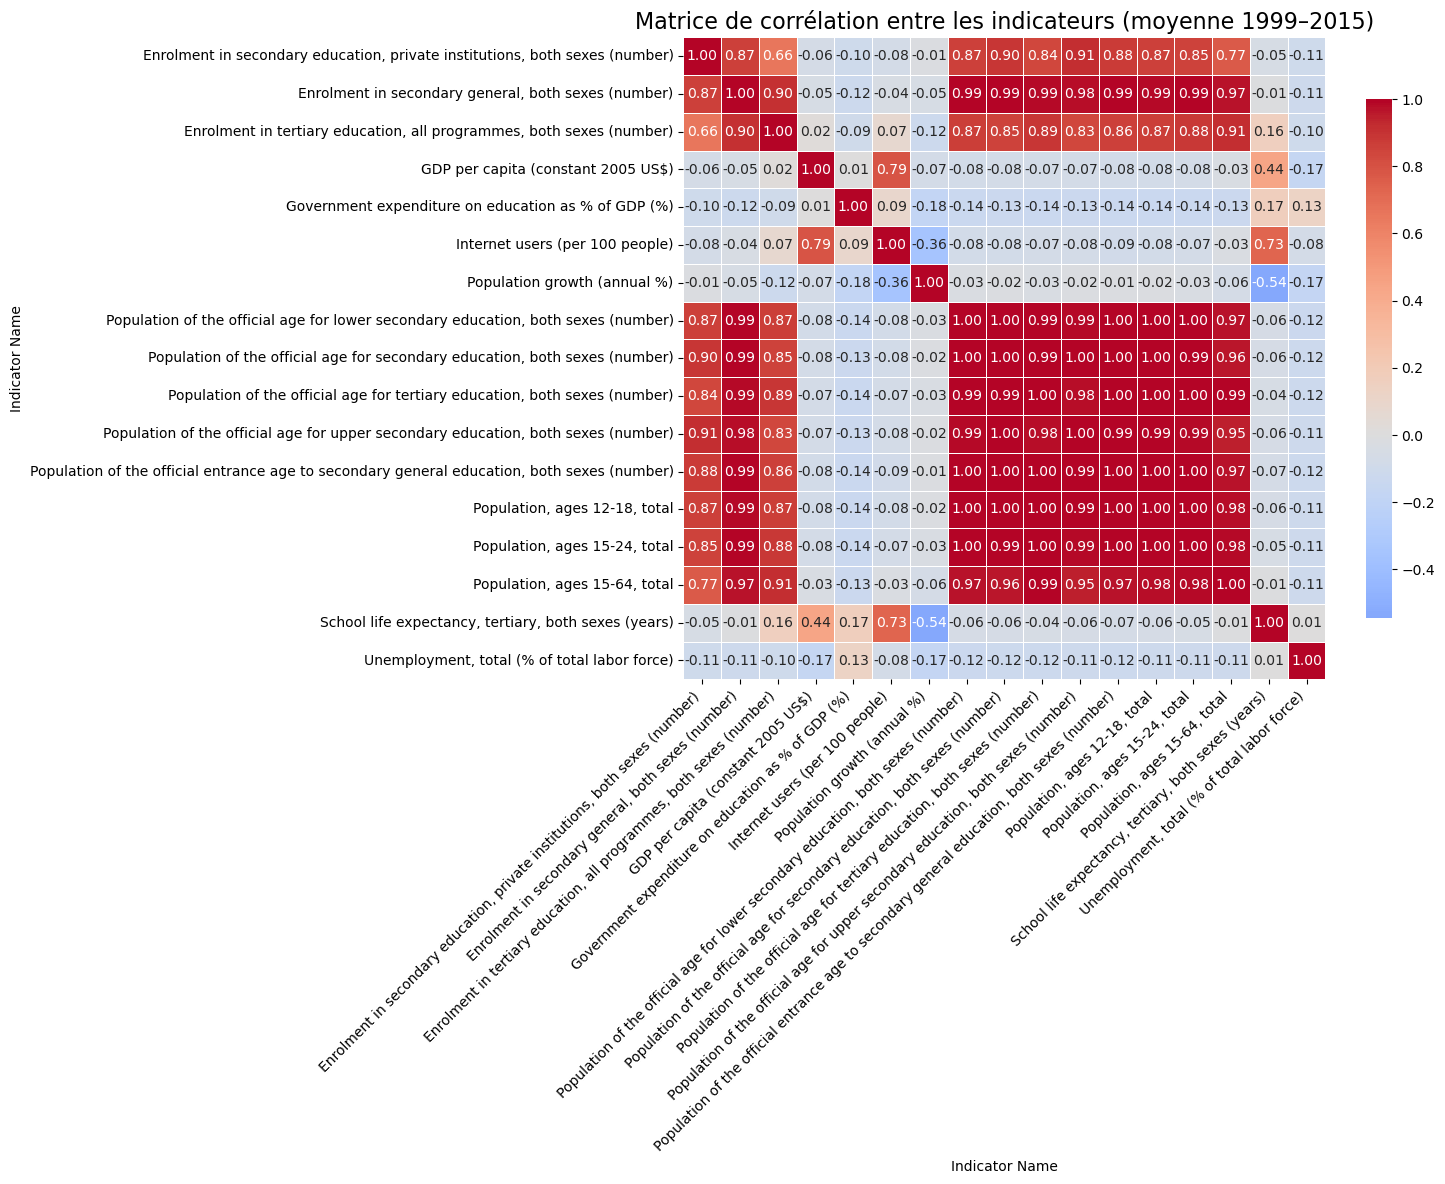

In [84]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    matrice_correlation_pearson_avant_imputation_SansNA,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation entre les indicateurs (moyenne 1999–2015)",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

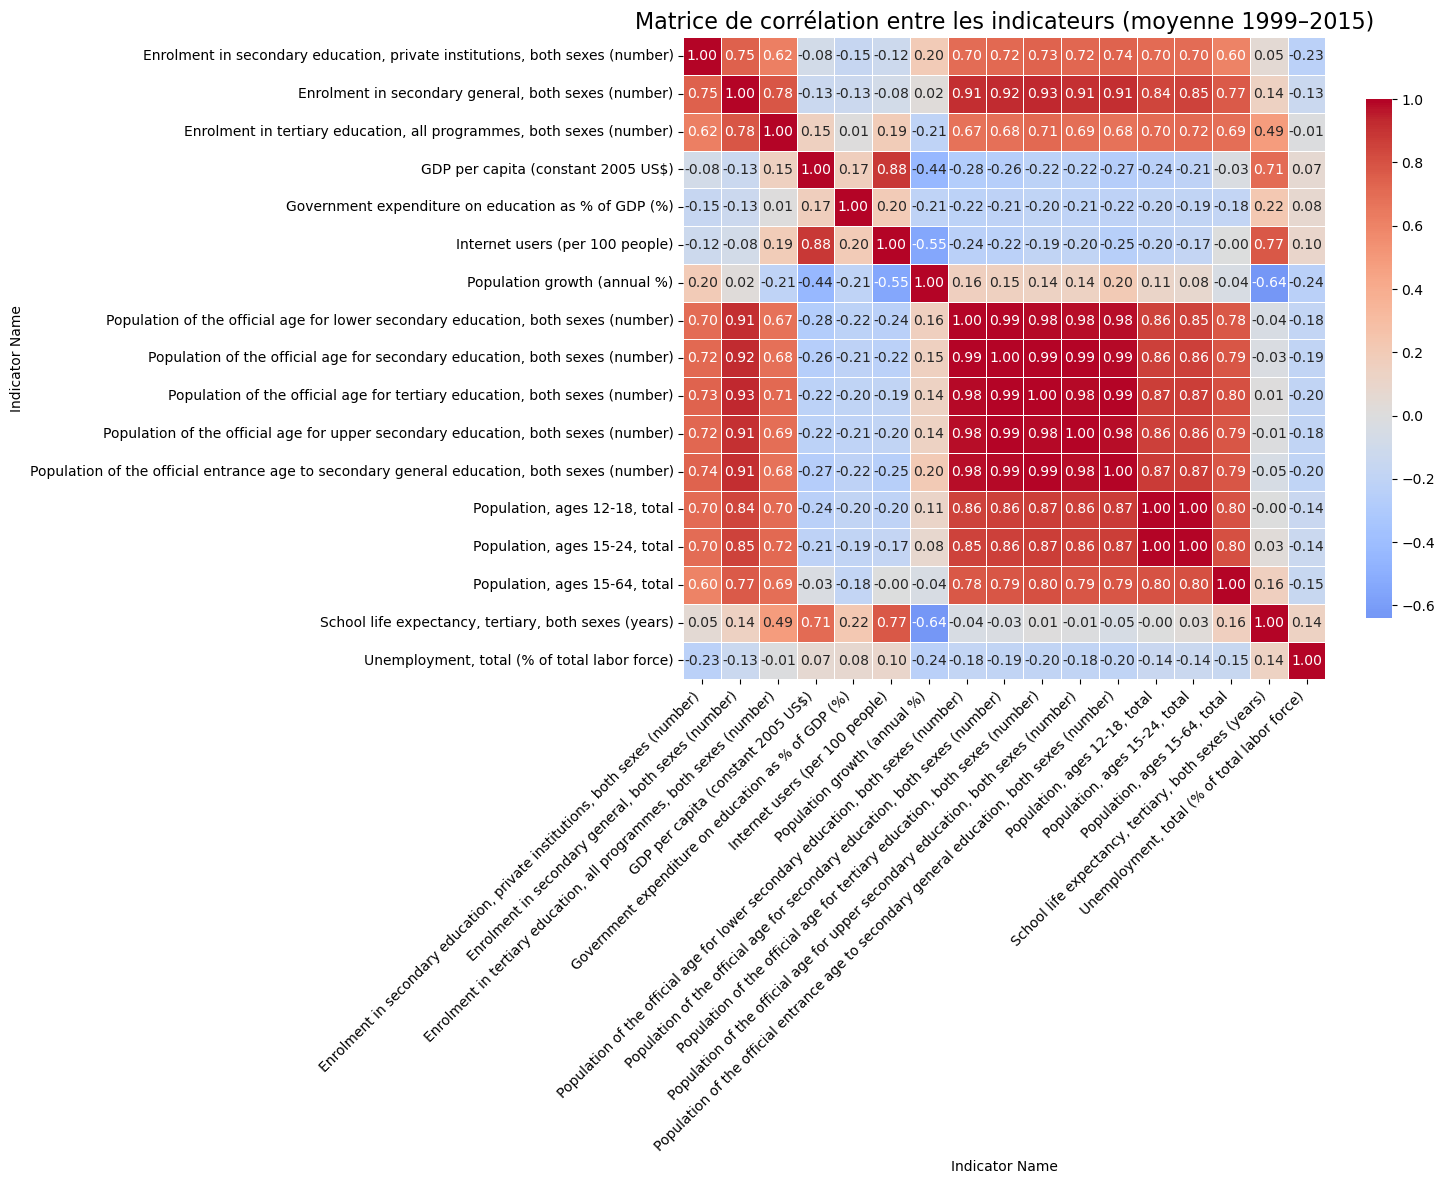

In [90]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    matrice_correlation_Spearman_avant_imputation_SansNA,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation entre les indicateurs (moyenne 1999–2015)",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [86]:
Pivot_table_final = Pivot_table_annee_cumulés_SansNA.copy()
colonnes_principales_a_garder = [
    "Enrolment in secondary general, both sexes (number)",
    "School life expectancy, tertiary, both sexes (years)"
]
colonnes_secondaires_a_garder = [
    "Unemployment, total (% of total labor force)",
    "Population growth (annual %)"
]
Pivot_table_colonnes_principales = Pivot_table_final[colonnes_principales_a_garder]
Pivot_table_colonnes_secondaires = Pivot_table_final[colonnes_secondaires_a_garder]
Pivot_table_colonnes_principales.head()

Indicator Name,"Enrolment in secondary general, both sexes (number)","School life expectancy, tertiary, both sexes (years)"
Country Name,,
Afghanistan,1.493449e+06,0.188350
Albania,3.474273e+05,1.732922
Algeria,3.568331e+06,1.218317
Andorra,3.573786e+03,1.505280
Angola,3.694516e+05,0.198800


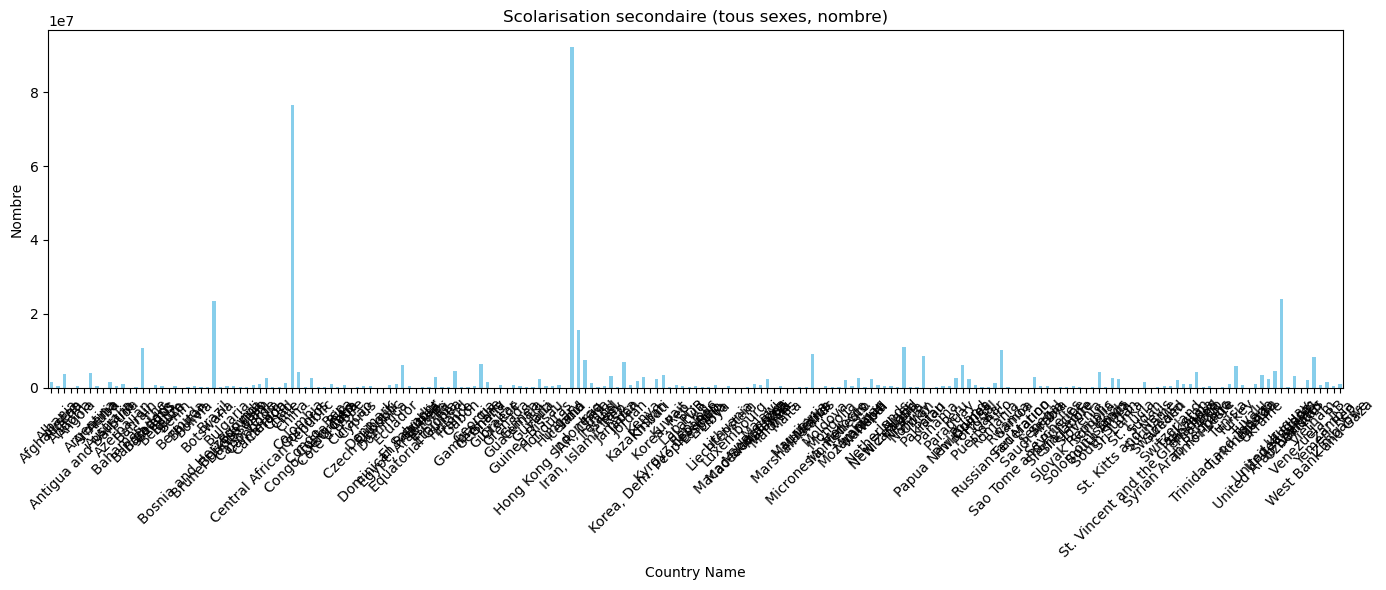

In [95]:
plt.figure(figsize=(14, 6))

Pivot_table_colonnes_principales[
    "Enrolment in secondary general, both sexes (number)"
].plot(kind='bar', color='skyblue')
plt.title("Scolarisation secondaire (tous sexes, nombre)")
plt.ylabel("Nombre")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

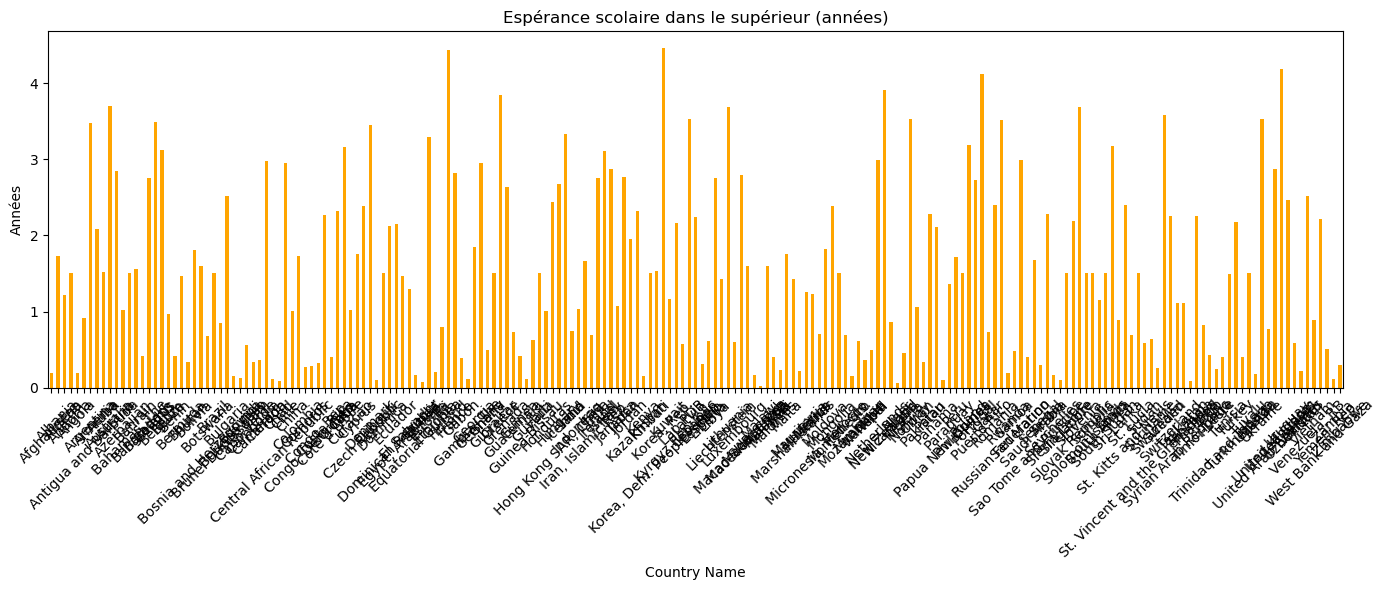

In [94]:
plt.figure(figsize=(14, 6))

Pivot_table_colonnes_principales[
    "School life expectancy, tertiary, both sexes (years)"
].plot(kind='bar', color='orange')
plt.title("Espérance scolaire dans le supérieur (années)")
plt.ylabel("Années")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [87]:
# 1. Classement strict par variable
classements = Pivot_table_colonnes_principales.rank(ascending=False, method='first')

# 2. Moyenne des rangs
classements["Classement moyen"] = classements.mean(axis=1)

# ✅ 3. Classement global basé sur la moyenne (le vrai classement)
classements["Rang final"] = (
    classements["Classement moyen"].rank(
        ascending=True, method='min').astype(int)
)

# 4. Fusion avec les données originales
Pivot_table_classe = pd.merge(
    Pivot_table_colonnes_principales, classements, left_on='Country Name', right_on='Country Name'
)

# 5. Tri par rang final
Pivot_table_classe = Pivot_table_classe.sort_values("Rang final")

Pivot_table_classe.head()

Indicator Name,"Enrolment in secondary general, both sexes (number)_x","School life expectancy, tertiary, both sexes (years)_x","Enrolment in secondary general, both sexes (number)_y","School life expectancy, tertiary, both sexes (years)_y",Classement moyen,Rang final
Country Name,,,,,,
United States,2.394684e+07,4.191876,3.0,3.0,3.0,1
Russian Federation,1.020470e+07,3.521810,8.0,14.0,11.0,2
"Korea, Rep.",3.302941e+06,4.458019,26.0,1.0,13.5,3
Ukraine,3.535020e+06,3.523447,25.0,12.0,18.5,4
Argentina,4.034183e+06,3.482450,23.0,16.0,19.5,5


# Creation d'un top 20 noté avec les variables dynamisme de la population et chômage

In [88]:
top20 = Pivot_table_classe.sort_values("Rang final").head(20)

Pivot_table_final = pd.merge(
    top20, Pivot_table_colonnes_secondaires, 
    left_on='Country Name', right_on='Country Name',
    how='left'
)

def noter_growth(val):
    if val > 2:
        return "Forte dynamique"
    elif val > 1:
        return "Stable"
    elif val > 0:
        return "Faible"  
    else:
        return "Negatif"

def noter_chomage(val):
    if val > 15:
        return "Chômage structurel sévère"
    elif val > 10:
        return "Accès difficile à l’emploi"
    elif val > 5:
        return "Tension modérée "
    else:
        return "Tension faible"

Pivot_table_final["Note croissance"] = Pivot_table_final["Population growth (annual %)"].apply(noter_growth)
Pivot_table_final["Note chômage"] = Pivot_table_final["Unemployment, total (% of total labor force)"].apply(noter_chomage)

del Pivot_table_final['Enrolment in secondary general, both sexes (number)_x']
del Pivot_table_final['School life expectancy, tertiary, both sexes (years)_x']
del Pivot_table_final['Unemployment, total (% of total labor force)']
del Pivot_table_final['Population growth (annual %)']

Pivot_table_final.head()

Indicator Name,"Enrolment in secondary general, both sexes (number)_y","School life expectancy, tertiary, both sexes (years)_y",Classement moyen,Rang final,Note croissance,Note chômage
Country Name,,,,,,
United States,3.0,3.0,3.0,1,Faible,Tension modérée
Russian Federation,8.0,14.0,11.0,2,Negatif,Tension modérée
"Korea, Rep.",26.0,1.0,13.5,3,Faible,Tension faible
Ukraine,25.0,12.0,18.5,4,Negatif,Tension modérée
Argentina,23.0,16.0,19.5,5,Stable,Accès difficile à l’emploi


In [91]:
Pivot_table_final.index

Index(['United States', 'Russian Federation', 'Korea, Rep.', 'Ukraine',
       'Argentina', 'Germany', 'Japan', 'United Kingdom', 'France', 'Spain',
       'Australia', 'Italy', 'Canada', 'Poland', 'Turkey', 'Thailand',
       'Belarus', 'Chile', 'Greece', 'Brazil'],
      dtype='object', name='Country Name')

In [92]:
Pivot_table_final.reset_index().to_csv("top20_analyse_strategique.csv", index=False, encoding="utf-8-sig")